
# Introduction to Regression

## Introduction

In this lab you will learn to apply linear regression modules using the the R lm function. In particularly;

1. Understand the basics of applying regression models for prediction. 
2. Evaluate the performance of regression models. 
2. Apply the R model language to the specification of machine learning models. 

## Overview of regression

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression models attempt to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explanatory variables** or **features**. Single regression has one feature used to predict one label. Multiple regression uses two of more features to predict the label. 

In mathematical form the goal of regression is to find a function of some features $X$ which predicts the label value $y$. This function can be written as follows:

$$\hat{y} = f(X)$$

The challenge in regression is to **learn** the function $f(X)$ so that the predictions of $\hat{y}$ are accurate. In other word, we train the model to minimize the difference between our predicted $\hat{y}$ and the known label values $y$. In fact, the entire field of **supervised learning** has this goal 

Many machine learning models, including some of the latest deep learning methods, are a form of regression. There methods often suffer from the same problems, including over-fitting and mathematically unstable fitting methods. 


### Overview of linear regression

In this lab, you will work with linear regression models. Linear regression are a foundational form of regression. Once you understand a bit about linear regression you will know quite a lot about machine learning in general.  

The simplest case of linear regression is know as **single regression**, since there is a single feature. The function $f(X)$ is **linear in the model coefficients**. For a single vector of features $x$ the linear regression equation is written as follows:

$$\hat{y} = a \cdot x + b$$

The model coefficients are $a$, which we call the **slope** and $b$, which we call the **intercept**. Notice that this is just the equation of a straight line for one variable. 

But, what are the best values of $a$ and $b$? In linear regression, $a$ and $b$ are chosen to minimize the squared error between the predictions and the known labels. This quantity is known as the **sum squared error** or SSE. For $n$ **training cases** the SSE is computed as follows:

$$SSE = \sum_{i=1}^n \big( f(x_i) - y_i \big)^2\\
= \sum_{i=1}^n \big( \hat{y}_i - y_i \big)^2\\
= \sum_{i=1}^n \big( a \cdot x_i + b - y_i \big)^2$$

The approach to regression that minimizes SSE is know as the **method of least squares**.

### Execute a first linear regression example 

With this bit of theory in mind, you will now train and evaluate a linear regression model. In this case you will use simulated data, which means that you can compare the computed results to the known properties of the data. 

As a first step, execute the code in the cell below to load the packages you will need to run the rest of this notebook. 

> **Note:** If you are running in Azure Notebooks, make sure that you run the code in the `setup.ipynb` notebook at the start of you session to ensure your environment is correctly configured. 

In [10]:
## Import packages
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions

The code in the cell below simulates the data and plots the result. The data has the following properties:

- The `x` variable is uniformly distributed between 0.0 and 10.0.
- The `y` variable equals the `x` variable plus a Normally distributed random component. As a result, for the unscaled data, the slope coefficient should be 1.0 and the intercept 0.0. 

Execute this code and examine the result. 

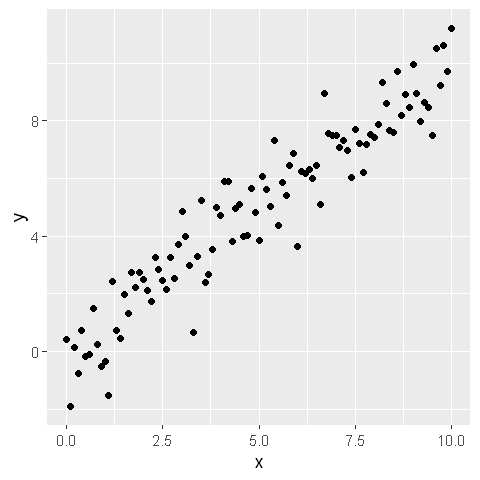

In [11]:
set.seed(34567)
df = data.frame(x = seq(from = 0.0, to = 10.0, by = 0.1))
df$y = df$x + rnorm(length(df$x), mean = 0.0, sd = 1.0)

ggplot(df, aes(x,y)) + geom_point()

As expected, these data follow a straight line trend. However, there is some dispersion of these data as a result of the addition of the Normally distributed noise. 

#### Split the dataset

When performing any type of machine learning, good data preparation is required to ensure good model performance. Poor data preparation is often the source of poor machine learning model performance. 

The first step in preparing these data is to create an **independently sampled** **training dataset** and **test data set**. In most cases, an independently sampled **evaluation dataset** will also be used. In this case, no model improvement or comparison will be performed so this additional step is unnecessary. 

If the same data are used to train and test a machine learning model, there is a high likelihood that the model will simply be learning the training data. In technical terms one can say that there is **information leakage** between the training and test processes. In this case, the model may not **generalize** well. A model that generalizes well produces consistent results when presented with new cases, never before encountered. Conversely, a model with poor generalization might give unexpected results when presented with a new case. 

The random sub-samples of the data are created using a process called **Bernoulli sampling**. Bernoulli sampling accepts a sample into the data subset with probability $p$. In this case, the probability that a given case is in the training dataset is $p$. The probability a case is in the test dataset then becomes $1-p$. 

The code in the cell below uses the `sample` function to create a set of indices for splitting the dataset. The index and the negative of the index are used to sample the original data frame. The code in the cell below performs this split. Execute this code.

In [12]:
set.seed(9988)
test_idx <- sample(seq_len(nrow(df)), size = 50)

train <- df[test_idx, ] # Select the training rows
test <- df[-test_idx, ] # Select the test rows
dim(train)
dim(test)

[1] 50  2

[1] 51  2

#### Scale numeric features

Now that the dataset is split, the numeric feature column must be re-scaled. Rescaling of numeric features is extremely important. If The numeric range of a feature should not determine how much  that feature determines the training of the machine learning model. 

For example, consider a data set with two features, age in years, typically measured in a few tens, and income, typically measured in tens or hundreds of thousands. There is no reason to believe that income is more important than age in some model, simply because its range of values is greater. To prevent this problem numeric features are scaled to the same range. 

There are many possible scaling methods. One simple method is known as **Min-Max** normalization. The data are scaled using the following formula to be in the range $\{ 0,1 \}$:

$$x\_scaled_i = \frac{(x_i - Min(x))}{(Max(x) - Min(x))}$$

where,
$x_i $ is the ith sample value,
$Min(X) $ is the minimum value of all samples,
$Max(X) $ is the maximum value of all samples.

In general, Min-Max normalization is a good choice for cases where the value being scaled has a complex distribution. For example, a variable with a distribution with multiple modes might be a good candidate for Min-Max normalization. Notice that the presence of a few outliers can distort the result by giving unrepresentative values of $Min(X)$ or $Max(X)$.


For this lab you will use **Z-Score** normalization. Z-Score normalization transforms a variable so that it has zero mean and unit standard deviation (or variance). Z-Score normalization is performed using the following formula:

$$x\_scaled_i = \frac{\big(x_i - \mu \big)}{\sigma}$$

where,
$\mu $ is the mean of the variable $X$,
$\sigma $ is the standard deviation of the variable $X$.

The code in the cell below computes the center (mean) and scale (standard deviation) of the feature. These scale parameters are then applied to the feature in the train and test data frame. 

Notice that the scaling transform is computed only on the training data. The scaling transform should always be computed on the training data, not the test or evaluation data. 

Generally, a numeric label does not need to be scaled. Other transformations may be required, however. 

Execute the code in the cell below that applies the Z-Score transformation to the training and test feature. 

In [13]:
scale = sd(train$y)
center = mean(train$y)
train$y = (train$y - center)/scale
test$y = (test$y - center)/scale

## Train the regression model

In R models are defined by an equation using the $\sim$ symbol to mean modeled by. In summary, the variable to be modeled is always on the left. The features are listed on the right. This basic scheme can be written as shown here. 

$$label \sim features$$

For example, if the dependent variable (dv) is modeled by two features (f1 and f2), with no interaction, the formula would be:

$$dv \sim f1 + f2$$

In this case there is only one feature or independent variable. So the simple formula in the code represent this model. Execute the code in the cell below to fit the model and create the model object. 

In [14]:
## fit the linear regression model
lin_mod = lm(y ~ x, data = train)

As a first verification of this model you can print the model coefficients. These coefficients are attributes of the model object. Execute the code in the cell below and examine the result.  

In [15]:
summary(lin_mod)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.4866745,0.09087328,-16.35986,2.899632e-21
x,0.3064045,0.01586968,19.30754,2.862109e-24


These coefficients are close to the values used in the simulation, $0.0$ and $1.0$. 

Next, you will plot the predicted values computed from the training features. The `predict` method is applied to the model object with the training data. A plot of the raw label values and the line of the predicted values or **scores** is then displayed. Execute the code and examine the results. 

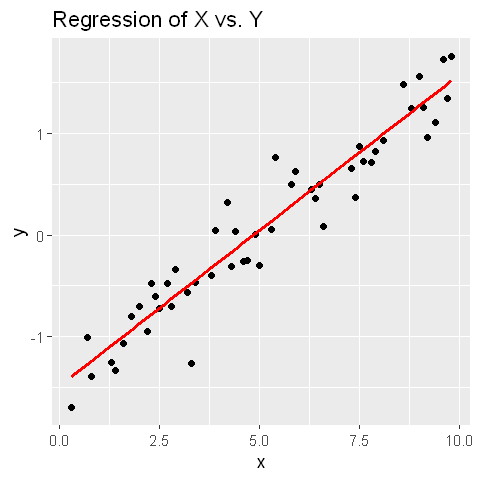

In [16]:
plot_regression = function(score, df){
    df$score = score
    ggplot(df) + geom_point(aes(x,y)) +
                 geom_line(aes(x,score), color = 'red', size = 1) +
                 ggtitle('Regression of X vs. Y')
}

score = predict(lin_mod, newdata = test)
plot_regression(score, test)

The red line appears to be a good fit to the data. The errors between the scored values and the residuals appear to be minimal. However, an objective evaluation of model performance is require.

## Evaluate model performance

With the model trained, it is time to evaluate the performance. This is done using the test dataset, so that there is no information leakage from the model training. 

As a first step, a set of performance metric are computed. There are many possible metrics used for the evaluation of regression models. Generally, these metrics are functions of the **residual value**, or difference between the predicted value or score and actual actual label value:

$$r_i = f(x_i) - y_i = \hat{y}_i - y_i$$

In this lab, you will work with some of the more common metrics:

- **Mean squared error** or MSE,  
$$MSE = \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2$$

The mean squared error is identical to the variance of the residuals (with a slight bias). Recall that this metric is the one linear regression minimizes. Notice that mean square error is in units of the square of the label values.   

- **Root mean squared error** or RMSE,  
$$RMSE = \sqrt{ \frac{1}{N} \sum_{i=1}^N (f(x_i) - y_i)^2}$$

The root mean squared error is identical to the standard deviation of the residuals (again, with a slight bias). Root mean square error is in the same units as the label values.  

- **Mean absolute error** or MAE,
$$MAE = \frac{1}{N} \sum_{i=1}^N |f(x_i) - y_i|$$  
where $||$ is the absolute value operator.  

The similar in interpretation to the root mean squared error. You may find this measure more intuitive since it is simply the average of the magnitude of the residuals.   

- **Median absolute error**,
$$Median\ Absolute\ Error = Median \big( \sum_{i=1}^N |f(x_i) - y_i| \big)$$   

The median absolute error is a robust measure of the location parameter of the absolute residuals. If this measure is significantly different from the mean absolute error, it is likely that there are outliers in the residuals. 

- **R squared or $R^2$**, also known as the **coefficient of determination**,  
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$  
where,   
$SS_{res} = \sum_{i=1}^N r_i^2$, or the sum of the squared residuals,   
$SS_{res} = \sum_{i=1}^N y_i^2$, or the sum of the squared label values.  

In other words, $R^2$ is  measure of the reduction in sum of squared values between the raw label values and the residuals. If the model has not reduced the sum of squares of the labels (a useless model!), $R^2 = 0$. On the other hand, if the model fits the data perfectly so all $r_i = 0$, then $R^2 = 1$. 

- **Adjusted R squared or $R^2_{adj}$** is $R^2$ adjusted for degrees of freedom in the model,
$$R^2_{adj} = 1 - \frac{var(r)}{var(y)} = 1 - \frac{\frac{SS_{res}}{(n - p -1)}}{\frac{SS_{tot}}{(n-1)}}$$  
where,   
$var(r) = $ the variance of the residuals,   
$var(y) = $ the variance of the labels,
$n = $ the number of samples or cases,
$p = $ number of model parameters.  

The interpretation of $R^2_{adj}$ is the same as $R^2$. In many cases there will be little difference. However if the number of parameters is significant with respect to the number of cases, $R^2$ will give an overly optimistic measure of model performance. In general, the difference between $R^2_{adj}$ and $R^2$ becomes less significant as the number of cases $n$ grows. However, even for 'big data' models there can be a significant difference if there are a large number of model parameters.   

****
**Note:** Is it possible to get values of $R^2$ outside the range $\{ 0,1 \}$? Ordinarily no. But there are exceptions.   

$R^2$ can only be greater than $1$ in degenerate cases. For example, if all label values are the same. But, in this case, you do not need a model to predict the label!

What if you find your model gives an $R^2$ less than $0$? What can this possibly mean? This invariably means that there is a bug in your code and that the residuals of your model have greater dispersion than the original labels!
****

The code in the cell below uses attributes of the linear model `summary` method, specifically to compute R squared and adjusted R squared. 

Execute the code in the cell below, examine the results, and answer **Question 1** on the course page.

In [17]:
print_metrics = function(lin_mod, df, score){
    resids = df$y - score
    resids2 = resids**2
    N = length(score)
    r2 = as.character(round(summary(lin_mod)$r.squared, 4))
    adj_r2 = as.character(round(summary(lin_mod)$adj.r.squared, 4))
    cat(paste('Mean Square Error      = ', as.character(round(sum(resids2)/N, 4)), '\n'))
    cat(paste('Root Mean Square Error = ', as.character(round(sqrt(sum(resids2)/N), 4)), '\n'))
    cat(paste('Mean Absolute Error    = ', as.character(round(sum(abs(resids))/N, 4)), '\n'))
    cat(paste('Median Absolute Error  = ', as.character(round(median(abs(resids)), 4)), '\n'))
    cat(paste('R^2                    = ', r2, '\n'))
    cat(paste('Adjusted R^2           = ', adj_r2, '\n'))
}

print_metrics(lin_mod, test, score)          

Mean Square Error      =  0.0662 
Root Mean Square Error =  0.2573 
Mean Absolute Error    =  0.2029 
Median Absolute Error  =  0.1692 
R^2                    =  0.8859 
Adjusted R^2           =  0.8835 


How can you interpret these results:
- The MSE and RMSE are as expected. The standard deviation of the simulated data is $1.0$. 
- The MAE and median absolute error have small values and are close together, indicating a good model fit and few significant outliers in the residuals. 
- The $R^2_{adj}$ and $R^2$ are both fairly close to one, indicating that the model is making useful predictions that are much better than the simple average of the label values.

The residuals of a linear regression model should have an approximately Normal distribution. This condition can be easily tested using graphical methods, specifically a histogram and a Quantile-Quantile Normal plot. 

****
**Note:** A common misconception is that the features or label of a linear regression model must have Normal distributions. This is not the case! Rather, the residuals (errors) of the model should be Normally distributed.   
****  

The code in the cell below plots a kernel density plot and histogram of the residuals of the regression model. Execute this code and examine the results. 

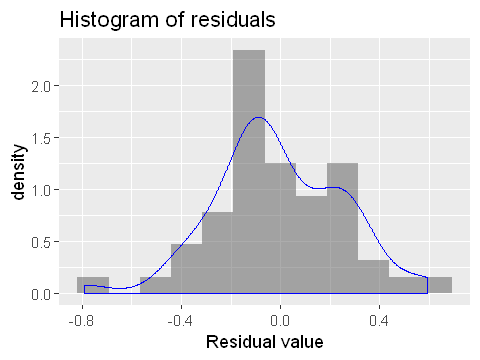

In [18]:
hist_resids = function(df, score, bins = 10){
    options(repr.plot.width=4, repr.plot.height=3) # Set the initial plot area dimensions
    df$resids = df$y - score
    bw = (max(df$resids) - min(df$resids))/(bins + 1)
    ggplot(df, aes(resids)) + 
       geom_histogram(binwidth = bw, aes(y=..density..), alpha = 0.5) +
       geom_density(aes(y=..density..), color = 'blue') +
    xlab('Residual value') + ggtitle('Histogram of residuals')
}

hist_resids(test, score)

This histogram and the kernel density plot look approximately Normal, but with some deviations. Overall, these residuals look reasonable for a real-world model.   

Another useful plot is the **Quantile-Quantile Normal plot**, or Q-Q Normal plot. This plot displays quantiles of a standard Normal distribution on the horizontal axis and the quantiles of the residuals on the vertical axis. If the residuals were perfectly Normally distributed, these points would fall on a straight line. In real-world problems, you should expect the straight line relationship to be approximate. 

Execute the code in the cell below and examine the resulting plot. 

> **Note:** You will need ggplot2 version 3.0 or above to execute the following code. 

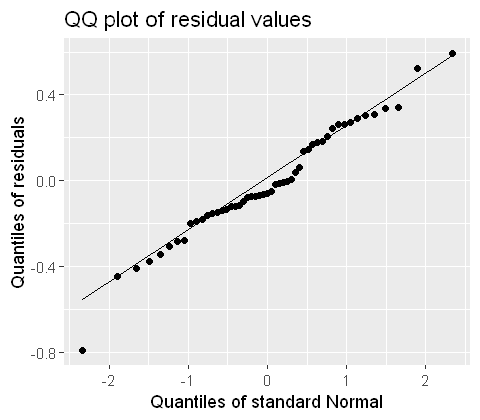

In [19]:
resids_qq = function(df, score, bins = 10){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    df$resids = df$y - score
    ggplot() + 
    geom_qq(data = df, aes(sample = resids)) + 
    stat_qq_line(data = df, aes(sample = resids)) +
    ylab('Quantiles of residuals') + xlab('Quantiles of standard Normal') +
    ggtitle('QQ plot of residual values')
}

resids_qq(test, score)

Notice that these points nearly fall along the straight line. This indicates that the residuals have a distribution which is approximately Normal.  

You will now make one last diagnostic plot for this regression model, known as a **residual plot**. A plot of residuals vs. predicted values (scores) shows if there is structure in the residuals. For an ideal regression model the variance or dispersion of the residuals should not change with the values of the predicted values. It has been said that the ideal residual plot should look like a 'fuzzy caterpillar' with no change vs. the predicted value. 

Any structure in this plot with change in predicted values indicates that the model fit changes with the predicted value. For example, if the residuals increase with predicted values the model can be said to predict only the smaller label values well. The opposite situation indicates that only large label values are well predicted. Changes in the mid-range indicate that there is some nonlinear change with predicted values. In other words, in any of these cases the model is not accurately computing the predicted values. 

Execute the code in the cell below to display and examine the residual plot for the regression model. 

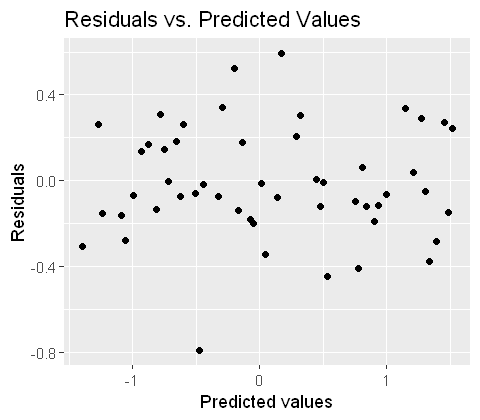

In [20]:
resid_plot = function(df, score){
    df$score = score
    df$resids = df$y - score
    ggplot(df, aes(score, resids)) + 
    geom_point() + 
    ggtitle('Residuals vs. Predicted Values') +
    xlab('Predicted values') + ylab('Residuals')
}

resid_plot(test, score)

This residual plot looks fairly well behaved. The dispersion is reasonably constant over the range of the predicted value. 

## Summary

In this lab you have performed a complete machine process for a linear regression model. The same steps are followed for creating and testing any machine learning model. The steps in this process include:

1. Simulated a dataset. In a typical regression problem, detailed data exploration would be performed.
2. Prepared the data. In this case preparation included splitting the data into training and test subsets and scaling the features. 
3. Constructed the regression model using training data with the R `lm` function.
4. Evaluated the results of the model using the test data. In this case the residuals were found to be reasonably small and well behaved. 